In [1]:
import matplotx
from matplotlib import pyplot as plt

plt.style.use(matplotx.styles.dracula)

In [2]:
from dataset import load_processed_dataset

df = load_processed_dataset()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 3159016 to 5937615
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n                        91 non-null     int64  
 1   m                        91 non-null     int64  
 2   k_avg                    91 non-null     float64
 3   edge_length_total        91 non-null     float64
 4   edge_length_avg          91 non-null     float64
 5   streets_per_node_avg     91 non-null     float64
 6   intersection_count       91 non-null     int64  
 7   street_length_total      91 non-null     float64
 8   street_segment_count     91 non-null     int64  
 9   street_length_avg        91 non-null     float64
 10  circuity_avg             91 non-null     float64
 11  self_loop_proportion     91 non-null     float64
 12  node_density_km          91 non-null     float64
 13  intersection_density_km  91 non-null     float64
 14  edge_density_km       

In [3]:
df.head()

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,...,4_way_int_prop,5_way_int_prop,6_way_int_prop,area,name,country_code,7_way_int_count,8_way_int_count,7_way_int_prop,8_way_int_prop
geoname_id,,,,,,,,,,,,,,,,,,,,,
3159016,4073,9291,4.562239,1416315.906,152.439555,2.495458,2929,746194.652,5075,147.033429,...,0.064081,0.000491,0.000246,4.143950e+08,Drammen,NO,NaN,NaN,NaN,NaN
2644487,3663,7885,4.305214,573208.904,72.696120,2.294021,2317,303316.771,4189,72.407919,...,0.030849,0.001911,NaN,3.881955e+07,Lincoln,GB,NaN,NaN,NaN,NaN
1700360,2319,5887,5.077188,1399899.918,237.795128,2.602846,1765,706218.384,3013,234.390436,...,0.081501,NaN,NaN,8.318202e+08,Mati,PH,NaN,NaN,NaN,NaN
3473964,2505,6510,5.197605,1160158.491,178.211750,2.942515,2119,622910.481,3672,169.637931,...,0.247505,0.001996,0.000798,3.906455e+08,Guaíba,BR,NaN,NaN,NaN,NaN
3899887,3219,8405,5.222119,786249.969,93.545505,2.994719,2853,461121.311,4816,95.747781,...,0.220876,0.001864,0.000311,1.480842e+08,Alto Hospicio,CL,NaN,NaN,NaN,NaN


In [4]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column] = df[column].astype('float32')
        df[column] = df[column].fillna(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 3159016 to 5937615
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n                        91 non-null     float32
 1   m                        91 non-null     float32
 2   k_avg                    91 non-null     float32
 3   edge_length_total        91 non-null     float32
 4   edge_length_avg          91 non-null     float32
 5   streets_per_node_avg     91 non-null     float32
 6   intersection_count       91 non-null     float32
 7   street_length_total      91 non-null     float32
 8   street_segment_count     91 non-null     float32
 9   street_length_avg        91 non-null     float32
 10  circuity_avg             91 non-null     float32
 11  self_loop_proportion     91 non-null     float32
 12  node_density_km          91 non-null     float32
 13  intersection_density_km  91 non-null     float32
 14  edge_density_km       

In [6]:
def get_numerical_features_array(df_):
    return df_.select_dtypes(include=['float32']).values

numerical_features = get_numerical_features_array(df)
numerical_features.shape

(91, 35)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

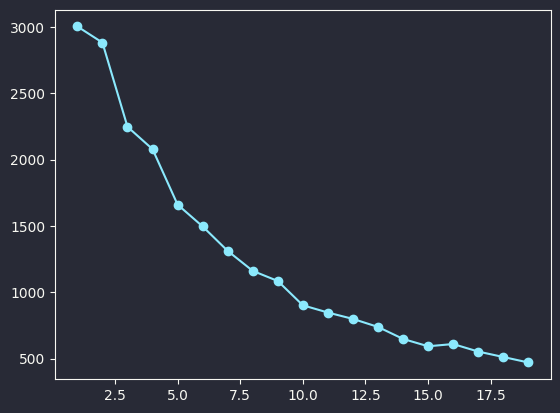

In [8]:
import numpy as np

def elbow_method(x: np.ndarray, max_k=10):
    from sklearn.cluster import KMeans

    distortions_ = []
    for k in range(1, max_k):
        kmeans_ = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(x)
        distortions_.append(kmeans_.inertia_)
    return distortions_

distortions = elbow_method(numerical_features_scaled, 20)
plt.plot(range(1, 20), distortions, marker='o')

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0, n_init="auto", n_clusters=10).fit(numerical_features_scaled)

In [10]:
def reduce_dimensions(x, n_components=2):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n_components)
    return pca.fit_transform(x)

In [11]:
def visualize_clusters(kmeans_, x):
    plt.scatter(x[:, 0], x[:, 1], c=kmeans_.labels_, cmap='rainbow')
    plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], color='black')
    plt.show()

In [12]:
def make_2d_clusters_visualization(x):
    x_2d = reduce_dimensions(x)
    kmeans_ = KMeans(random_state=0, n_init="auto", n_clusters=10).fit(x_2d)
    visualize_clusters(kmeans_, x_2d)

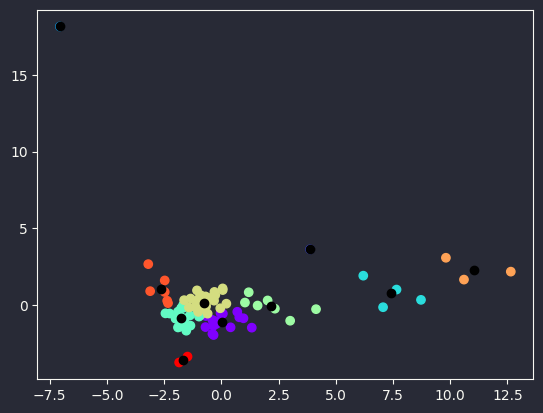

In [13]:
make_2d_clusters_visualization(numerical_features_scaled)

In [14]:
from dataset import load_dataset

raw_dataset_df = load_dataset()
raw_dataset_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 140931 entries, 0 to 140930
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   geoname_id         140931 non-null  object  
 1   name               140931 non-null  object  
 2   ascii_name         140930 non-null  object  
 3   alternate_names    116604 non-null  object  
 4   feature_class      140931 non-null  object  
 5   feature_code       140931 non-null  object  
 6   country_code       140931 non-null  object  
 7   cou_name_en        140763 non-null  object  
 8   country_code_2     81 non-null      object  
 9   admin1_code        140904 non-null  object  
 10  admin2_code        122264 non-null  object  
 11  admin3_code        68826 non-null   object  
 12  admin4_code        20569 non-null   object  
 13  population         140931 non-null  int64   
 14  elevation          27648 non-null   object  
 15  dem                140931 

In [15]:
df["cluster"] = kmeans.labels_
df["geoname_id"] = df.index.astype('int64')
df = df.reset_index(drop=True, inplace=False)
df.head()

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,...,6_way_int_prop,area,name,country_code,7_way_int_count,8_way_int_count,7_way_int_prop,8_way_int_prop,cluster,geoname_id
0,4073.0,9291.0,4.562239,1416315.875,152.439560,2.495458,2929.0,746194.62500,5075.0,147.033432,...,0.000246,414395008.0,Drammen,NO,0.0,0.0,0.0,0.0,7,3159016
1,3663.0,7885.0,4.305214,573208.875,72.696121,2.294021,2317.0,303316.78125,4189.0,72.407921,...,0.000000,38819548.0,Lincoln,GB,0.0,0.0,0.0,0.0,7,2644487
2,2319.0,5887.0,5.077188,1399899.875,237.795135,2.602846,1765.0,706218.37500,3013.0,234.390442,...,0.000000,831820224.0,Mati,PH,0.0,0.0,0.0,0.0,8,1700360
3,2505.0,6510.0,5.197605,1160158.500,178.211746,2.942515,2119.0,622910.50000,3672.0,169.637924,...,0.000798,390645504.0,Guaíba,BR,0.0,0.0,0.0,0.0,1,3473964
4,3219.0,8405.0,5.222119,786250.000,93.545502,2.994719,2853.0,461121.31250,4816.0,95.747780,...,0.000311,148084192.0,Alto Hospicio,CL,0.0,0.0,0.0,0.0,4,3899887


In [16]:
raw_dataset_df["geoname_id"] = raw_dataset_df["geoname_id"].astype('int64')
raw_dataset_df = raw_dataset_df.reset_index(drop=True, inplace=False)
merged_datasets_df = raw_dataset_df.merge(df, on="geoname_id", how='inner')
merged_datasets_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   geoname_id               91 non-null     int64   
 1   name_x                   91 non-null     object  
 2   ascii_name               91 non-null     object  
 3   alternate_names          87 non-null     object  
 4   feature_class            91 non-null     object  
 5   feature_code             91 non-null     object  
 6   country_code_x           91 non-null     object  
 7   cou_name_en              91 non-null     object  
 8   country_code_2           0 non-null      object  
 9   admin1_code              91 non-null     object  
 10  admin2_code              72 non-null     object  
 11  admin3_code              23 non-null     object  
 12  admin4_code              3 non-null      object  
 13  population               91 non-null     int64   
 14  elev

In [17]:
merged_datasets_df.head()

,geoname_id,name_x,ascii_name,alternate_names,feature_class,feature_code,country_code_x,cou_name_en,country_code_2,admin1_code,...,5_way_int_prop,6_way_int_prop,area,name_y,country_code_y,7_way_int_count,8_way_int_count,7_way_int_prop,8_way_int_prop,cluster
0,3460791,Itanhaém,Itanhaem,"[Itan'jaehn, Itanhaen, JTN, Nossa Senhora da C...",P,PPLA2,BR,Brazil,NaN,27,...,0.001673,0.000000,2.948891e+08,Itanhaém,BR,0.0,0.0,0.0,0.0,4
1,3463690,Eunápolis,Eunapolis,NaN,P,PPL,BR,Brazil,NaN,05,...,0.000594,0.000000,1.363687e+09,Eunápolis,BR,0.0,0.0,0.0,0.0,4
2,3473964,Guaíba,Guaiba,"[Guaiba, Guaíba]",P,PPL,BR,Brazil,NaN,23,...,0.001996,0.000798,3.906455e+08,Guaíba,BR,0.0,0.0,0.0,0.0,1
3,624079,Orsha,Orsha,"[Orsa, Orscha, Orsha, Orsza, Orŝa, Orša, TXC, ...",P,PPLA2,BY,Belarus,NaN,07,...,0.000883,0.000000,4.152720e+07,Orsha,BY,0.0,0.0,0.0,0.0,1
4,5937615,Delta,Delta,"[Del'ta, Delta, delta, deruta, dlth, dylta, sa...",P,PPL,CA,Canada,NaN,02,...,0.003337,0.000000,2.573366e+08,Delta,CA,0.0,0.0,0.0,0.0,1


In [31]:
import folium

colors = [
    "red",
    "blue",
    "green",
    "purple",
    "orange",
    "darkred",
    "lightred",
    "beige",
    "darkblue",
    "darkgreen",
    "cadetblue",
    "darkpurple",
    "white",
    "pink",
    "lightblue",
    "lightgreen",
    "gray",
    "black",
    "lightgray",
]

m = folium.Map()
folium.GeoJson(
    merged_datasets_df,
    name="Cities with population over 100 000 people - clustered",
    zoom_on_click=True,
    tooltip=folium.GeoJsonTooltip(fields=["ascii_name", "cou_name_en", "population"]),
    popup=folium.GeoJsonPopup(fields=["ascii_name", "cou_name_en", "population"]),
).add_to(m)

for _, row in merged_datasets_df.iterrows():
    folium.Marker(
        name=row["ascii_name"],
        location=(row["geometry"].x, row["geometry"].y)[::-1],
        tooltip=folium.Tooltip(
            f"{row['ascii_name']} ({row['cou_name_en']}) - {row['population']}"
        ),
        popup=folium.Popup(
            f"{row['ascii_name']} ({row['cou_name_en']}) - {row['population']}"
        ),
        icon=folium.Icon(color=colors[row["cluster"]], radius=4),
        zoom_on_click=True,
    ).add_to(m)
m

In [32]:
m.save("cities_clustered.html")